In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

import os
os.getcwd()

Cranial = pd.read_csv('/Users/88firefly/Feline-Bones-Final-Project/data/Felidae Cranial Data.csv',delimiter=',')
Forelimb= pd.read_csv('/Users/88firefly/Feline-Bones-Final-Project/data/Felidae and Canidae postcranial database.csv',delimiter=',')

Forelimb_Data=Forelimb.values[:261,:] #cut out dogs

Forelimb_genusID=Forelimb_Data[:,2]
Forelimb_speciesID=Forelimb_Data[:,3]
Forelimb_sexID=Forelimb_Data[:,4]

Cranial_Data=Cranial.values

Cranial_genusID=Cranial_Data[:,2]
Cranial_speciesID=Cranial_Data[:,3]
Cranial_sexID=Cranial_Data[:,4]

print("The Cranial dataset has", np.unique(Cranial[['Species']]).shape, "unique species, and", Cranial.shape, "samples.")
print("The Forelimb dataset has", np.unique(Forelimb[['Species']]).shape, "unique species, and", Forelimb.shape, "samples.")



The Cranial dataset has (77,) unique species, and (338, 52) samples.
The Forelimb dataset has (95,) unique species, and (323, 61) samples.


In [2]:
ComboData_All=Cranial.merge(Forelimb,how='outer', on=None, left_on='Catalog no.', right_on='Catalog no.')
ComboData_Shared=Cranial.merge(Forelimb,how='inner', on=None, left_on='Catalog no.', right_on='Catalog no.')

In [3]:
def NullsInFrame(df):
    if df.isnull().values.any() == True:
        df_a = df.isnull().sum().sum()
        df_b = df.shape[0]*df.shape[1]
        print("There are", df_a, "NaN(s) out of,", df_b ,"total cells, which is", 100*df_a/df_b,"% of the data."  )
    else:
        print("No NaN")

In [4]:
NullsInFrame(Cranial)

There are 439 NaN(s) out of, 17576 total cells, which is 2.4977241693218026 % of the data.


In [5]:
NullsInFrame(Forelimb)

There are 2694 NaN(s) out of, 19703 total cells, which is 13.673044714002943 % of the data.


In [6]:
NullsInFrame(ComboData_Shared)

There are 917 NaN(s) out of, 12096 total cells, which is 7.581018518518518 % of the data.


In [8]:
NullsInFrame(ComboData_All)

There are 27959 NaN(s) out of, 62048 total cells, which is 45.06027591542032 % of the data.


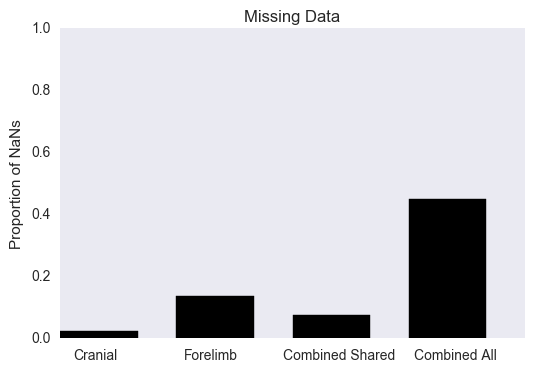

In [14]:
NaNpercentages = np.array([0.024977, 0.136730, 0.075810, 0.450602])
dfNames = np.array([["Cranial Data", "Forelimb Data", "Combined Overlap Data", "Combined Data"]])

y = NaNpercentages
N = len(y)
x = range(N)
width = 1/1.5
plt.bar(x, y, width, color="black")
plt.title('Missing Data')
plt.ylabel('Proportion of NaNs')
plt.xlabel('')
plt.grid(b=0)
plt.xticks([0.3, 1.3, 2.4, 3.4], ["Cranial", "Forelimb", "Combined Shared", "Combined All"])
plt.ylim(0, 1)
plt.savefig('NaNGraph.jpg')